**Autores**

*   [135385] Ramiro, Gallego
*   [208443] Cristian, Palma



#Práctico 3: Modelo de clasificacion - Decision Tree

## Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive, files
from sklearn import tree
import seaborn as sns

# google colab
#!pip install matplotlib scikit-learn pandas
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#Puede ser necesario reiniciar el kernel. van a Runtime > Restart Runtime

# local
# !pip install matplotlib scikit-learn pandas pandas-profiling

##Carga de datos

In [3]:
# Carga de los datos (desde drive)
#drive.mount('/content/drive', force_remount=True)

df = pd.read_csv("tennis.csv", sep = ",")

##Análisis

In [4]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Eliminamos la variable "Day", es un identificador 100% distinto que no nos aporta valor.

In [5]:
df = df.drop('Day', axis=1)

In [6]:
df

Outlook  Temp Humidity    Wind Tennis
0      Sunny   Hot     High    Weak     No
1      Sunny   Hot     High  Strong     No
2   Overcast   Hot     High    Weak    Yes
3       Rain  Mild     High    Weak    Yes
4       Rain  Cool   Normal    Weak    Yes
5       Rain  Cool   Normal  Strong     No
6   Overcast  Cool   Normal  Strong    Yes
7      Sunny  Mild     High    Weak     No
8      Sunny  Cool   Normal    Weak    Yes
9       Rain  Mild   Normal    Weak    Yes
10     Sunny  Mild   Normal  Strong    Yes
11  Overcast  Mild     High  Strong    Yes
12  Overcast   Hot   Normal    Weak    Yes
13      Rain  Mild     High  Strong     No

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Wind      14 non-null     object
 4   Tennis    14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


Todas las variables son categóricas (a excepción de la variable a predecir), por lo tanto, hacemos OneHotEncoding.

In [8]:
describedDF = df.describe()

In [9]:
describedDF.transpose()

count unique    top freq
Outlook     14      3  Sunny    5
Temp        14      3   Mild    6
Humidity    14      2   High    7
Wind        14      2   Weak    8
Tennis      14      2    Yes    9

In [10]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [11]:
df_dummy

Outlook_Rain  Outlook_Sunny  Temp_Hot  Temp_Mild  Humidity_Normal  \
0              0              1         1          0                0   
1              0              1         1          0                0   
2              0              0         1          0                0   
3              1              0         0          1                0   
4              1              0         0          0                1   
5              1              0         0          0                1   
6              0              0         0          0                1   
7              0              1         0          1                0   
8              0              1         0          0                1   
9              1              0         0          1                1   
10             0              1         0          1                1   
11             0              0         0          1                0   
12             0              0         1          0                1   
13             1              0         0          1                0   

    Wind_Weak  Tennis_Yes  
0           1           0  
1           0           0  
2           1           1  
3           1           1  
4           1           1  
5           0           0  
6           0           1  
7           1           0  
8           1           1  
9           1           1  
10          0           1  
11          0           1  
12          1           1  
13          0           0

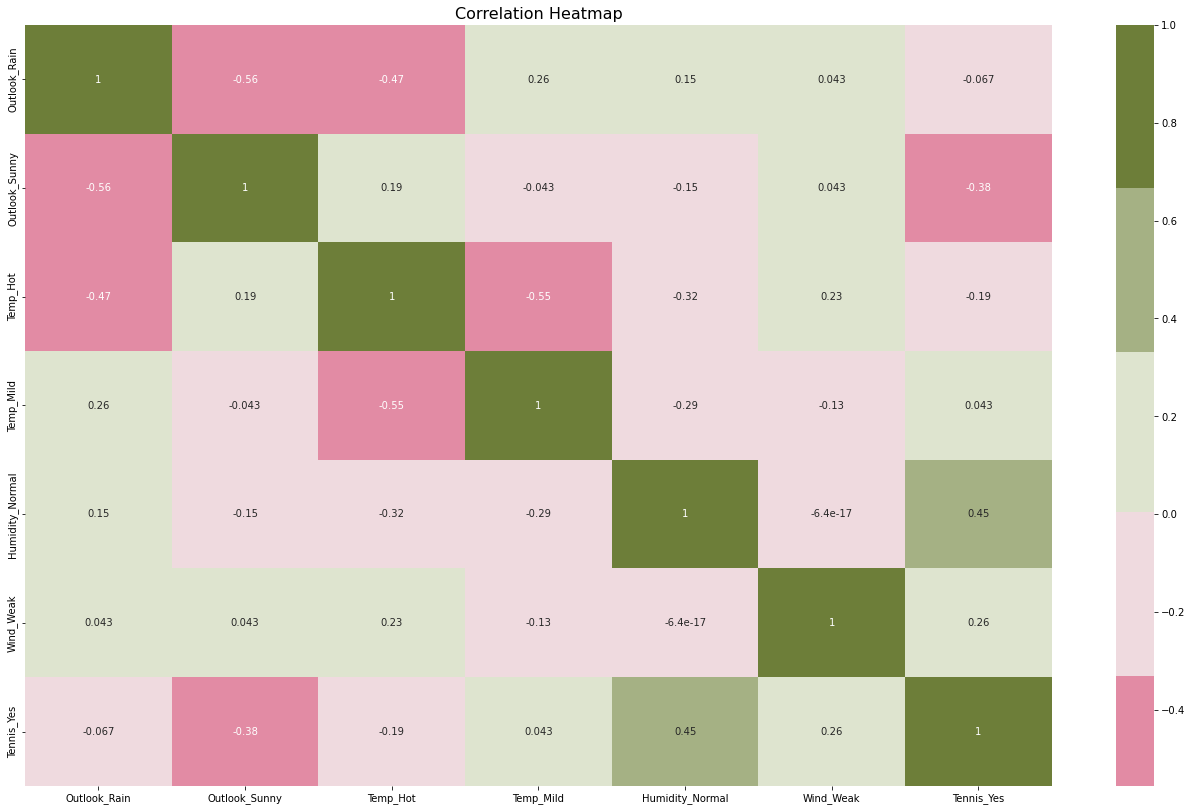

In [12]:
# Esta línea solo debe descomentarse si los plots no se dibujan correctamente
#%matplotlib inline

plt.figure(figsize = (23, 14))
cmap = sns.diverging_palette(0, 100, sep = 20)
sns.heatmap(df_dummy.corr(), annot = True, cmap = cmap, center = 0).set_title("Correlation Heatmap", fontsize = 16)
plt.show()

##Clasificación

Para este problema de ejemplo vamos a entrenar un modelo sencillo basado en [Árboles de Decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Los árboles de decision son algoritmos de Machine Learning supervisado. Se construye un arbol binario (cada nodo tiene dos ramas). Los valores objetivos se presentan en las hojas de los arboles.

Pero antes de poder llegar a eso debemos dividir el dataset en conjuntos adecuados para **entrenar** y **testar** el modelo.

Nos guardamos en data_x las features predictoras y en data_y la variable a predecir

In [13]:
data_x = df_dummy.drop('Tennis_Yes', axis=1)
data_y = df_dummy['Tennis_Yes']

### Entrenamiento

In [14]:
arbol_default = tree.DecisionTreeClassifier() 
arbol_default.fit(data_x, data_y)

DecisionTreeClassifier()

### Visualización del árbol

Para obtener cual class names es mayor y saber cual va primero

In [15]:
df_dummy.Tennis_Yes.value_counts()

1    9
0    5
Name: Tennis_Yes, dtype: int64

[Text(0.5555555555555556, 0.9, 'Humidity_Normal <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'Outlook_Sunny <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = No'),
 Text(0.2222222222222222, 0.5, 'Outlook_Rain <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.3333333333333333, 0.3, 'Wind_Weak <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.7777777777777778, 0.7, 'Wind_Weak <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = Yes'),
 Text(0.6666666666666666, 0.5, 'Outlook_Rain <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass

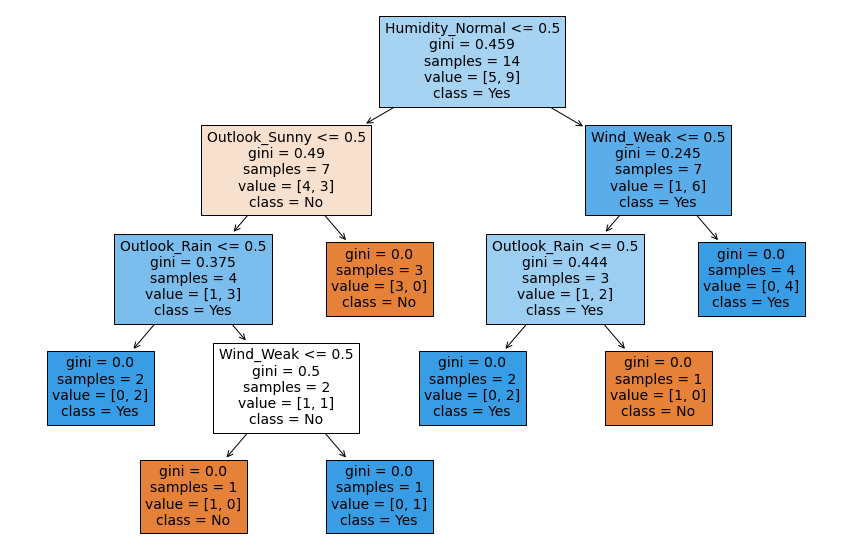

In [16]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(arbol_default, feature_names=df_dummy.columns, class_names=["No","Yes"], filled=True)

Podemos ver la importancia relativa de cada feature, calculada en el árbol para el criterio Gini (criterio por defecto)

In [17]:
importances = pd.DataFrame(arbol_default.feature_importances_.reshape(1,-1), columns=data_x.columns, index = ["importancia"])
importances

Outlook_Rain  Outlook_Sunny  Temp_Hot  Temp_Mild  \
importancia      0.285185            0.3       0.0        0.0   

             Humidity_Normal  Wind_Weak  
importancia              0.2   0.214815

Entreanamos otro árbol, ajustando algunos hiperparámetros

In [18]:
arbol_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2) 
arbol_entropy.fit(data_x, data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'Humidity_Normal <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.25, 0.5, 'Outlook_Sunny <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.75, 0.5, 'Wind_Weak <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes')]

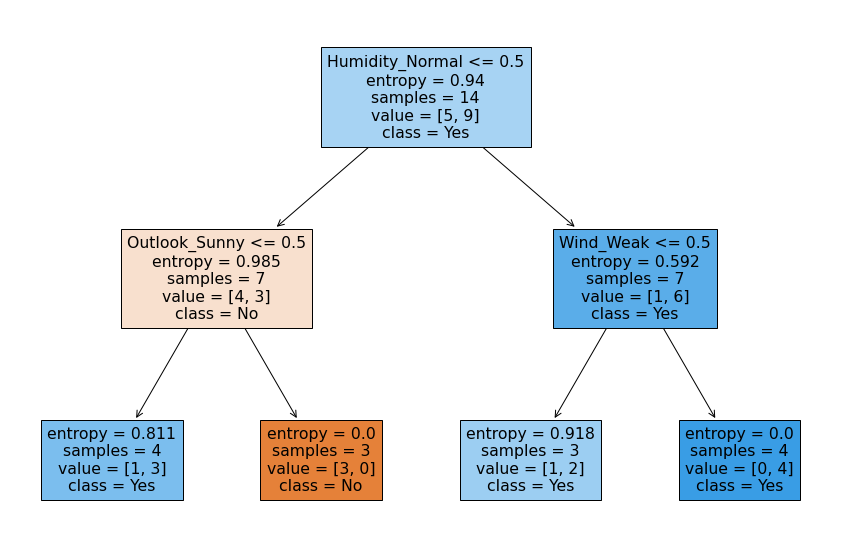

In [19]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(arbol_entropy, feature_names=df_dummy.columns, class_names=["No","Yes"], filled=True)

### Ejercicio 1
En base a lo visto en el teórico, ¿qué proceso MUY importante nos está faltando aplicar antes de entrenar nuestro modelo?

Data Splitting, separar en: {Training data, Validation data y Test Data}

### Matriz de confusion

c:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


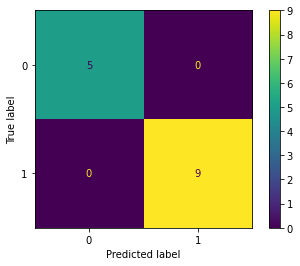

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(arbol_default, data_x, data_y) 

c:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


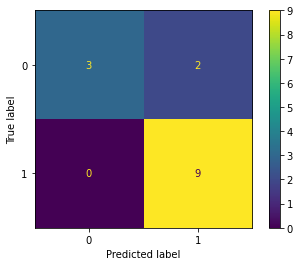

In [21]:
plot_confusion_matrix(arbol_entropy, data_x, data_y) 

### Ejercicio 2
Hacer una funcion que mida la accuracy de su modelo, luego compare el resultado con lo mismo calculado por sklearn.

Accuracy: que porcentaje de los datos fueron clasificados correctamente?

**Debe ajustar la siguiente función**

In [23]:
def calculate_accuracy(un_arbol, X_test, y_test):
  #assert type(y_true) is type(np.ndarray(shape=(2,2))), 'Only numpy.ndarray allowed in y_true.'
  #assert type(y_pred) is type(np.ndarray(shape=(2,2))), 'Only numpy.ndarray allowed in y_pred.'
  assert len(X_test) == len(y_test), 'X_test must be the same length as y_test'

  tp = 0
  tn = 0
  fp = 0
  fn = 0
  elementCount=len(y_test)

  Y_pred = un_arbol.predict(X_test)

  for i in range(elementCount):
    if Y_pred[i] == 0:
      if Y_pred[i] == y_test[i]:
        tn +=1
      else:
        fn +=1
    else:#positive cases
      if Y_pred[i] == y_test[i]:
        tp +=1
      else:
        fp +=1

  return (tp+tn)/(tp+tn+fp+fn)

In [24]:
# Técnica A
print("Técnica A - Árbol Entropy:", calculate_accuracy(arbol_entropy, data_x, data_y))

# Técnica B
from sklearn.metrics import accuracy_score
Y_pred = arbol_entropy.predict(data_x)
print("Técnica B - Árbol Entropy:", accuracy_score(Y_pred, data_y))

Técnica A - Árbol Entropy: 0.8571428571428571
Técnica B - Árbol Entropy: 0.8571428571428571


## Ejercicios - Nuevo dataset

La siguiente tarea implica el uso de un dataset real para el cual van a tener que entrenar un Árbol de decisión para detectar cáncer de mama a partir de distintas mediciones. 

La descripción del dataset la pueden encontrar aquí: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
breast_cancer_df=pd.read_csv("breast-cancer-wisconsin.csv", header = None,sep = ",")
breast_cancer_df.head()

0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2

Otra forma de traer el dataset, descargarlo con wget y luego importarlo

In [160]:
# Descargo dataset
! wget -O breast_cancer.csv https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

column_names = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]
breast_cancer_df_other = pd.read_csv("breast_cancer.csv", header = None, names = column_names)

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer.csv'

In [176]:
breast_cancer_df.columns = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]
breast_cancer_df.head()

Id  clump_thicknes  cell_size  cell_shape  adhesion  \
0  1000025               5          1           1         1   
1  1002945               5          4           4         5   
2  1015425               3          1           1         1   
3  1016277               6          8           8         1   
4  1017023               4          1           1         3   

   epithelial_cell_size nuclei  chromatin  nucleoli  mitoses  target  
0                     2      1          3         1        1       2  
1                     7     10          3         2        1       2  
2                     2      2          3         1        1       2  
3                     3      4          3         7        1       2  
4                     2      1          3         1        1       2

In [177]:
# En el dataset las clases son 2 y 4 que representan "benigno" y "maligno" respectivamente, vamos a reemplazarlas por 0 y 1 por simplicidad.
breast_cancer_df["target"].replace(2, 0, inplace=True)
breast_cancer_df["target"].replace(4, 1, inplace=True)

# 2 era cancer benigno (ahora es 0)
# 4 era cancer maligno (ahora es 1)

La columna "Id" no aporta valor, podemos trabajarlo de distintas maneras

In [178]:
# Opcion A) Eliminamos la columna de ID ya que no nos interesa
breast_cancer_df.drop(columns="Id", inplace=True)

# Opcion B) Hacemos que el ID sea el Index
#breast_cancer_df.set_index("Id", inplace = True)
breast_cancer_df.head()

clump_thicknes  cell_size  cell_shape  adhesion  epithelial_cell_size  \
0               5          1           1         1                     2   
1               5          4           4         5                     7   
2               3          1           1         1                     2   
3               6          8           8         1                     3   
4               4          1           1         3                     2   

  nuclei  chromatin  nucleoli  mitoses  target  
0      1          3         1        1       0  
1     10          3         2        1       0  
2      2          3         1        1       0  
3      4          3         7        1       0  
4      1          3         1        1       0

In [179]:
# Finalmente, contamos cuantos ejemplos son beningnos y cuantos no (0 = B, 1 = M)
breast_cancer_df.target.value_counts()

0    458
1    241
Name: target, dtype: int64

Es recomendable ver que valores toma cada variable, quizá no hay Null o NaN, pero si hay valores inconsistentes

In [180]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   clump_thicknes        699 non-null    int64 
 1   cell_size             699 non-null    int64 
 2   cell_shape            699 non-null    int64 
 3   adhesion              699 non-null    int64 
 4   epithelial_cell_size  699 non-null    int64 
 5   nuclei                699 non-null    object
 6   chromatin             699 non-null    int64 
 7   nucleoli              699 non-null    int64 
 8   mitoses               699 non-null    int64 
 9   target                699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [182]:
#for col in breast_cancer_df.columns:
#  print(breast_cancer_df[col].value_counts(),"\n")

In [183]:
breast_cancer_df["nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64

In [197]:
breast_cancer_df[breast_cancer_df["nuclei"]=='?']

clump_thicknes  cell_size  cell_shape  adhesion  epithelial_cell_size  \
23                8          4           5         1                     2   
40                6          6           6         9                     6   
139               1          1           1         1                     1   
145               1          1           3         1                     2   
158               1          1           2         1                     3   
164               5          1           1         1                     2   
235               3          1           4         1                     2   
249               3          1           1         1                     2   
275               3          1           3         1                     2   
292               8          8           8         1                     2   
294               1          1           1         1                     2   
297               5          4           3         1                     2   
315               4          6           5         6                     7   
321               3          1           1         1                     2   
411               1          1           1         1                     1   
617               1          1           1         1                     1   

    nuclei  chromatin  nucleoli  mitoses  target  
23       ?          7         3        1       1  
40       ?          7         8        1       0  
139      ?          2         1        1       0  
145      ?          2         1        1       0  
158      ?          1         1        1       0  
164      ?          3         1        1       0  
235      ?          3         1        1       0  
249      ?          3         1        1       0  
275      ?          2         1        1       0  
292      ?          6        10        1       1  
294      ?          2         1        1       0  
297      ?          2         3        1       0  
315      ?          4         9        1       0  
321      ?          3         1        1       0  
411      ?          2         1        1       0  
617      ?          1         1        1       0

### Ejercicio 3:  
Tratar las observaciones que tienen "?" como valor en el "nuclei". Explique por qué utilizó el método que haya decidido.

In [198]:
breast_cancer_df_2 = breast_cancer_df.copy()

**Puede ayudarse de la siguiente función**

In [200]:
breast_cancer_df_2.nuclei = breast_cancer_df_2.nuclei.apply(lambda x: np.nan if x == '?' else x)


In [216]:
breast_cancer_df_2[breast_cancer_df_2["nuclei"]=='?']

Empty DataFrame
Columns: [clump_thicknes, cell_size, cell_shape, adhesion, epithelial_cell_size, nuclei, chromatin, nucleoli, mitoses, target]
Index: []

In [217]:
len(breast_cancer_df_2.nuclei)

699

In [218]:
len(breast_cancer_df_2[breast_cancer_df_2.nuclei.isnull()])

16

Al tratarse de tan solo 16 casos en una muestra de 699 casos, decidimos eliminar las filas que contienen nuclei = ?

In [219]:
breast_cancer_df_2.nuclei.isnull().mean()

0.022889842632331903

In [220]:
filt = breast_cancer_df_2['nuclei'].isna() == True
breast_cancer_df_2.drop(index = breast_cancer_df_2[filt].index , inplace=True)

In [221]:
breast_cancer_df_2.nuclei.isnull().mean()

0.0

In [223]:
breast_cancer_df= breast_cancer_df_2.copy()
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   clump_thicknes        683 non-null    int64 
 1   cell_size             683 non-null    int64 
 2   cell_shape            683 non-null    int64 
 3   adhesion              683 non-null    int64 
 4   epithelial_cell_size  683 non-null    int64 
 5   nuclei                683 non-null    object
 6   chromatin             683 non-null    int64 
 7   nucleoli              683 non-null    int64 
 8   mitoses               683 non-null    int64 
 9   target                683 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


### Ejercicio 4  
**Análisis Exploratorio**

Realice un análisis exploratorio de los datos para contestar mínimamente lo siguiente:

1.   ¿Cuantos registros tiene el dataset? 
2.   ¿Cuantos features existen y de que tipo son? ¿Habría que modificar alguno?
3.   ¿Cuantos registros hay Benignos (0) y Malignos (1)?
4.   ¿Existen variables correlacionadas? Si es así, realice las modificaciones que crea pertinente
5.   ¿Es necesario utilizar one hot enconding? ¿Por qué?
6.   ¿Es necesario realizar feature scaling? ¿Por qué?
7.   ¿La media de las variables es diferente según si el registro es bengino o maligno?
8.   Grafique las variables separando registros bengignos vs malignos

In [ ]:
# Se espera más que solo hacer PandasProfile

profile = ProfileReport(breast_cancer_df)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [224]:
# En PandasProfiling veo varias celdas duplicadas, las trabajo

# Da False la primera ocurrencia de una duplicada
print(breast_cancer_df.duplicated(keep='first').value_counts(), "\n")

# Da True la última ocurrencia de una duplicada
print(breast_cancer_df.duplicated(keep='last').value_counts(), "\n")

breast_cancer_df_duplicated_rows = breast_cancer_df[breast_cancer_df.duplicated(keep='first')]
len(breast_cancer_df_duplicated_rows)

False    449
True     234
dtype: int64 

False    449
True     234
dtype: int64 



234

In [225]:
# En realidad PandasProfiling indica 48 duplicadas. Parece indicar las duplicadas distintas solamente, pero hay muchas que se repiten
breast_cancer_df_duplicated_rows.duplicated(keep='first').value_counts()

True     188
False     46
dtype: int64

In [226]:
breast_cancer_df_duplicated_rows.head()

clump_thicknes  cell_size  cell_shape  adhesion  epithelial_cell_size  \
28               2          1           1         1                     2   
35               2          1           1         1                     2   
48               4          1           1         3                     2   
64               1          1           1         1                     2   
66               4          1           1         1                     2   

   nuclei  chromatin  nucleoli  mitoses  target  
28      1          2         1        1       0  
35      1          2         1        1       0  
48      1          3         1        1       0  
64      1          2         1        1       0  
66      1          3         1        1       0

In [227]:
breast_cancer_df_duplicated_rows.index

Int64Index([ 28,  35,  48,  64,  66,  88,  90,  92,  93,  94,
            ...
            678, 679, 683, 684, 685, 686, 688, 690, 692, 695],
           dtype='int64', length=234)

In [228]:
breast_cancer_df_without_duplicates = breast_cancer_df.drop(breast_cancer_df_duplicated_rows.index, axis=0, inplace=False)

In [229]:
breast_cancer_df_without_duplicates.shape

(449, 10)

In [230]:
breast_cancer_df_without_duplicates.duplicated(keep='first').value_counts()

False    449
dtype: int64

In [ ]:
# Otra forma, más sencilla
breast_cancer_df_without_duplicates2 = breast_cancer_df.drop_duplicates(keep='first')
breast_cancer_df_without_duplicates2.shape

(463, 10)

El mapa de correlación se ve fuertemente modificado al eliminar duplicados, eran muchos

Text(0.5, 1.0, 'Correlation Heatmap')

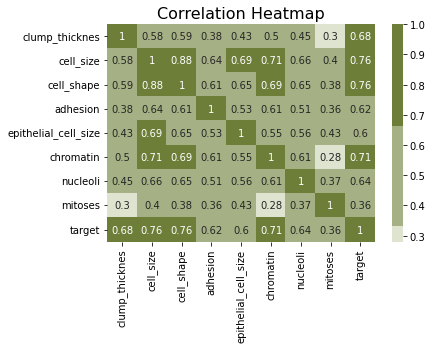

In [ ]:
cmap = sns.diverging_palette(0, 100, sep = 20)
sns.heatmap(breast_cancer_df_without_duplicates2.corr(), annot = True, cmap = cmap, center = 0).set_title("Correlation Heatmap", fontsize = 16)

In [ ]:
# Su código

###Ejercicio 5:  
**Arbol de decisión**

Cree un Árbol de Decisión para este set de datos que alcance al menos 93% de accuracy. 
Recuerde realizar los siguientes pasos:
- Separar los datos en conjuntos de train y test
- Entrenar el modelo
- Evaluar el modelo
- Graficar el arbol

Es un proceso iterativo y debe entrenar al menos 3 árboles con distintos hiperparámetros. Elija uno y explique por qué.

In [ ]:
df = breast_cancer_df_without_duplicates2.copy(deep=True)

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42

X = df.drop(['target'],axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = random_state)

In [ ]:
print(f'df shape = {df.shape}\n')
print(f'X_train shape = {X_train.shape}')
print(f'y_train shape = {y_train.shape}\n')
print(f'X_test shape = {X_test.shape}')
print(f'y_test shape = {y_test.shape}')

df shape = (463, 10)

X_train shape = (299, 8)
y_train shape = (299,)

X_test shape = (161, 8)
y_test shape = (161,)


In [ ]:
# Su código

### Ejercicio 6:  
Calcule y cree un nuevo DataFrame con los valores representativos para el bias y la varianza de cada árbol entrenado.

bias = error en train
varianza = diferencia entre el error en train y el error en test

Ordénelos por complejidad y grafique ambos valores.

**Se puede apoyar en las siguientes funciones y definiciones**

In [ ]:
# Su código

df_bias_variance = pd.DataFrame(
    {
        "Bias": [bias_arbol1, bias_arbol2, bias_arbol3],
        "Variance": [var_arbol1, var_arbol2, var_arbol3]
    },
    index = ["Arbol1", "Arbol2", "Arbol3"])


def plot_metrics(df):
  plt.plot(df.Bias, label='Bias', color='blue')
  plt.plot(df.Variance, label='Var', color='orange')
  plt.title('%s: loss')
  plt.xlabel('Complexity')
  plt.ylabel('Error')
  plt.legend()
  plt.show()

In [ ]:
# Su código

**Formato de entrega**: esta misma notebook en formato .ipynb, cambiar el nombre por ApellidoNombre1_ApellidoNombre2_Tarea_1.
Es importante que la notebook pueda ejecutarse sin problemas al seleccionar 'Ejecutar todo'.


**Plazo de entrega**: hasta el 10/10 a través de Aulas.